<a href="https://colab.research.google.com/github/syahrinalfi/MachineLearningTasks/blob/main/6thWeekTasks/6_GColab_K_Means_Clustering_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Muhammad Alfi Syahrin
* NIM : 1103213144
* Lecture : 6
* Model : Clustering
* Dataset : [Mall_Customers](https://www.kaggle.com/datasets/shwetabh123/mall-customers)


## **Import Library**

In [1]:
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt

## **Import File**

In [2]:
# Menghubungkan Colab dengan Google Drive
drive.mount('/content/drive')

# Path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Minggu 6/Mall_Customers.csv'

# Membaca file CSV menggunakan pandas
df = pd.read_csv(file_path)

Mounted at /content/drive


## **Informasi Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## **Preprocessing Data**

In [6]:
# Menjatuhkan fitur CustomerID
df.drop('CustomerID', axis=1, inplace=True)

# Mengubah nama kolom 'Genre' menjadi 'Gender'
df.rename(columns={'Genre': 'Gender'}, inplace=True)

In [7]:
# One-hot Encode untuk kolom kategorikal
df = pd.get_dummies(df, columns=['Gender'])

In [8]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


## **Mencari Jumlah Cluster Terbaik**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

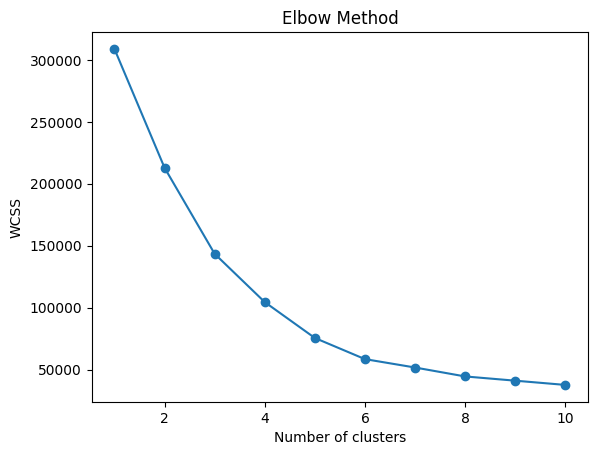

In [9]:
# Menghitung inersia untuk berbagai jumlah cluster
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## **Melatih Model K-Means**

In [10]:
# Melatih model K-means dengan 6 kelompok
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(df)

# Menambahkan kolom hasil clustering ke DataFrame
df['Cluster'] = kmeans.labels_

# Menampilkan hasil clustering
print("Hasil Clustering:")
df

Hasil Clustering:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,19,15,39,0,1,5
1,21,15,81,0,1,2
2,20,16,6,1,0,5
3,23,16,77,1,0,2
4,31,17,40,1,0,5
...,...,...,...,...,...,...
195,35,120,79,1,0,0
196,45,126,28,1,0,3
197,32,126,74,0,1,0
198,32,137,18,0,1,3


## **Visualisasi Hasil Clustering**

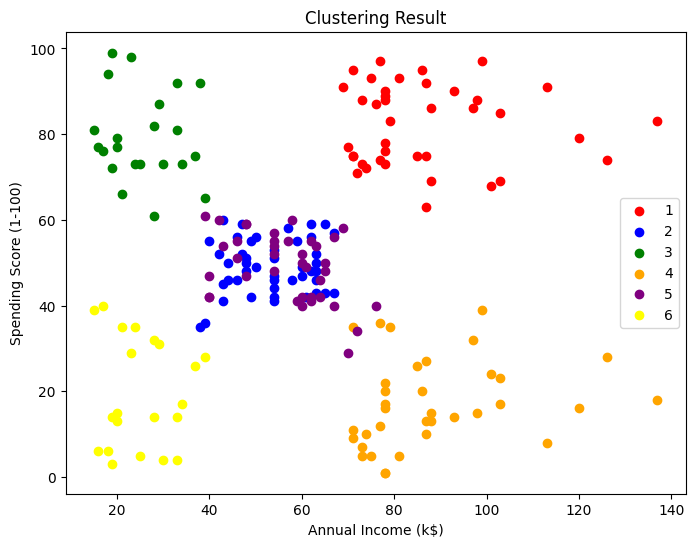

In [11]:
# Plot hasil clustering
plt.figure(figsize=(8, 6))

# Memilih warna untuk setiap kelompok
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

# Membuat scatter plot untuk setiap kelompok
for cluster_num in range(6):
    cluster_data = df[df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], color=colors[cluster_num], label=f'{cluster_num + 1}')

# Menambahkan label sumbu dan judul plot
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Result')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

## **Evaluasi Model**

In [12]:
# Menghitung silhouette score
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Menghitung Davies-Bouldin Index
db_index = davies_bouldin_score(df, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

# Menghitung inertia score
inertia_score = kmeans.inertia_
print(f"Inertia Score: {inertia_score}")

Silhouette Score: 0.45383239505020895
Davies-Bouldin Index: 0.7454179956230904
Inertia Score: 58396.83940503942
